# Part II - Ford GoBike System Data Explanatory
## by Dat Mai Huynh Phuoc

## Investigation Overview

The objective of this presentation is to showcase the trend of bike-sharing data, including important factors such as trip duration, and participant information such as age, gender, and user type. This allows us to have a comprehensive view of the dataset and understand the biking trends of a segment of the population in 2019.


## Dataset Overview and Executive Summary

The dataset contains details regarding rides taken within a bike-sharing network spanning the expansive San Francisco Bay area. It comprises 183,412 entries across 16 distinct categories. Among these attributes are the duration of each trip, its commencement and conclusion timestamps including dates, the names of originating and destination stations, corresponding coordinates for both starting and ending points, customer classification, whether the bike was shared for the entire journey, and the method used for rental access.

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
df = pd.read_csv('data/201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [26]:
df.dropna(inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [27]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [28]:
df.shape

(174952, 16)

## Distribution of Bike Share for all trips

Question: How does bike sharing distribute across all trips?

The raw dataset contains 183,412 rows and 16 columns, with several missing values in some columns. After cleaning the dataset, it comprises 174,952 rows and 25 columns. There are approximately 16,000 users who do not utilize bike sharing for all trips, constituting around 90% of the total users. The remaining 10% of users share bikes for every trip.

In [29]:
def plot_bar_chart(feature):
    # Bar chart
    feature_counts = df[feature].value_counts()
    plt.figure(figsize=(8, 6))
    feature_counts.plot(kind='bar', color='lightcoral')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [30]:
def plot_pie_chart(feature):
    # Pie chart
    feature_counts = df[feature].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage of {feature}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

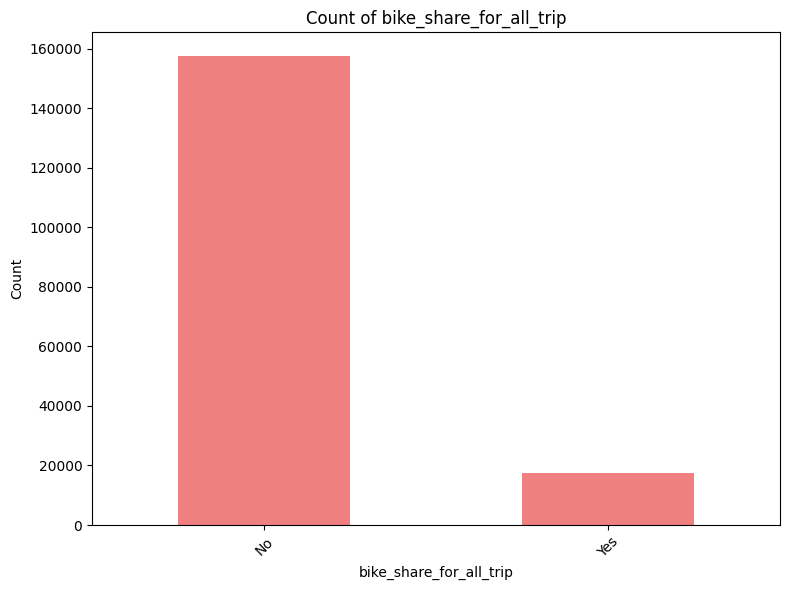

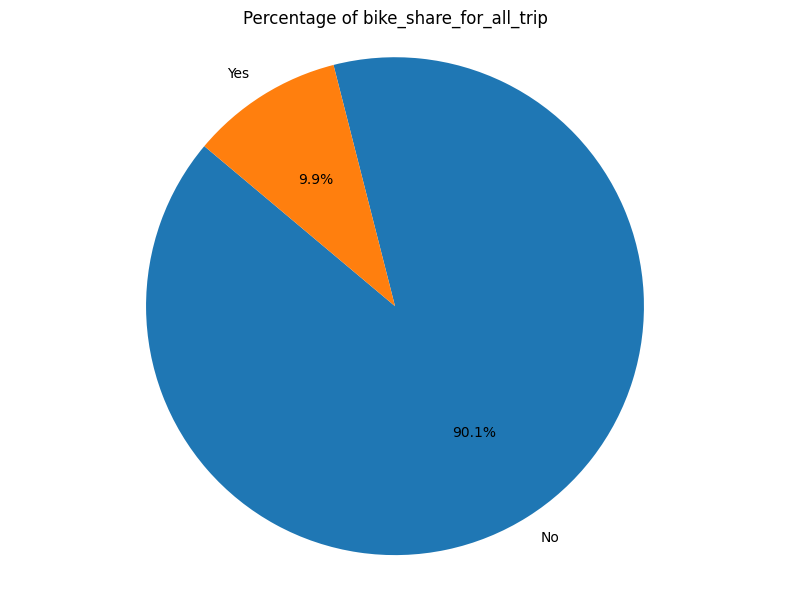

In [31]:
plot_bar_chart('bike_share_for_all_trip')
plot_pie_chart('bike_share_for_all_trip')

## Age of participants
Question: What is the age distribution of the participants?

The age distribution of participants is uneven, with individuals born between 1980 and 2000 constituting the majority. This indicates that younger individuals have a higher participation rate.

In [32]:
def plot_histogram(feature):
    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df[feature], bins=30, color='lightcoral', edgecolor='black')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    if feature == 'duration_sec':
        plt.xlim(0,8000)
    plt.tight_layout()
    plt.show()

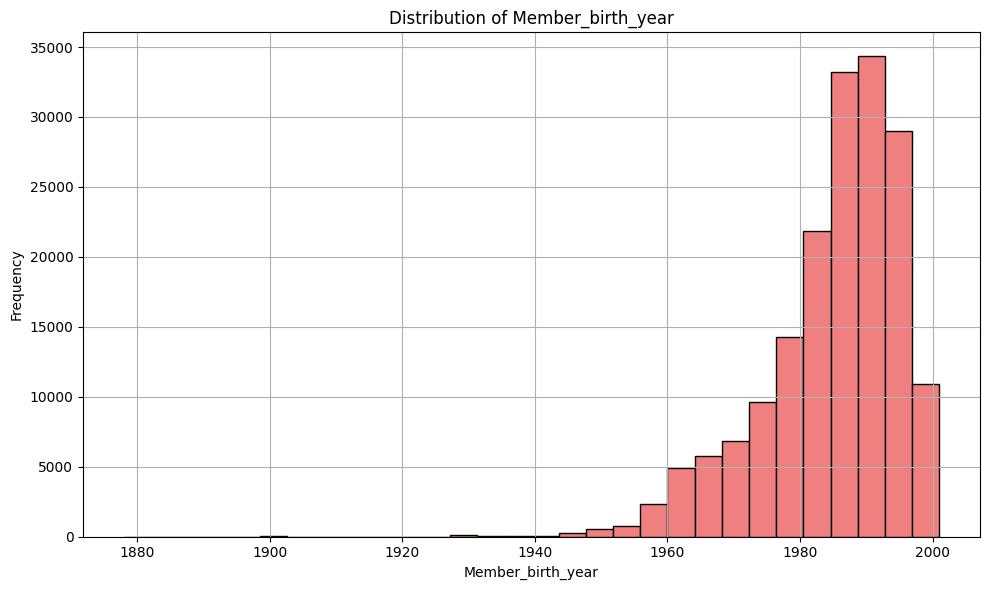

In [33]:
plot_histogram('member_birth_year')

## The correlation between age and trip duration
Question: What is the correlation between participant age and trip duration?

Trip duration is inversely proportional to user age, with younger users taking longer trips.

In [34]:
def plot_scatter(variable1, variable2):
    # Create a color gradient from light red to dark red
    cmap = plt.cm.get_cmap('Reds')
    colors = np.linspace(0, 1, len(df))

    # Scatter plot with color gradient
    plt.figure(figsize=(10, 6))
    plt.scatter(df[variable1], df[variable2], c=colors, cmap=cmap, alpha=0.5)
    plt.colorbar(label='Color Gradient')  # Add color bar legend
    plt.title(f'Scatter Plot of {variable2.capitalize()} vs. {variable1.capitalize()}')
    plt.xlabel(variable1.capitalize())
    plt.ylabel(f'{variable2.capitalize()}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

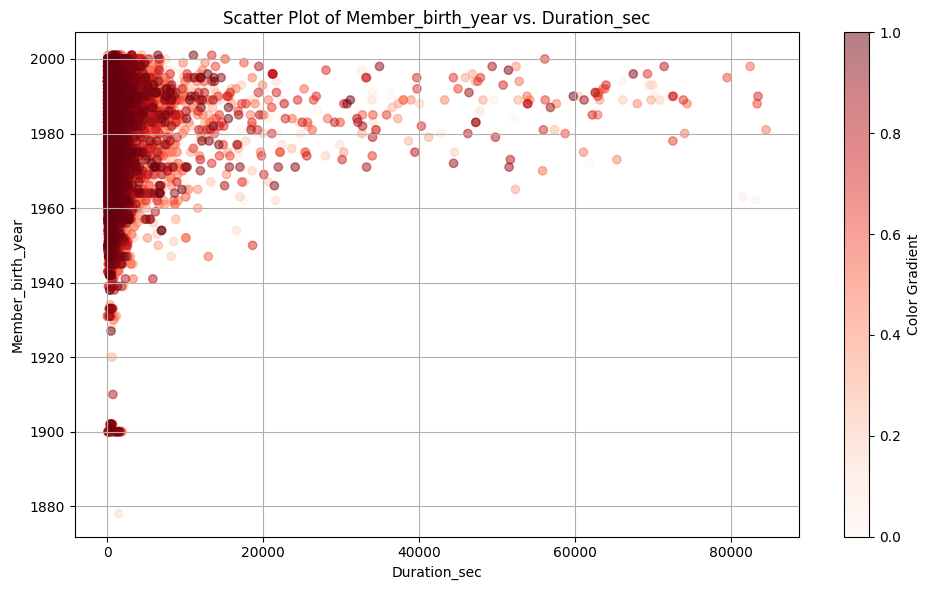

In [35]:
plot_scatter('duration_sec','member_birth_year')

## The distribution of trip durations between start and end times.
Question: How is the distribution of trip durations between start and end times?

The durations of trips are evenly and reasonably distributed within the time frame from the start time to the end time.

In [36]:
def preprocess_time(df):
    """
    Preprocess 'start_time' and 'end_time' columns to obtain numerical values.

    Parameters:
    - df: DataFrame containing the data.

    Returns:
    - df: DataFrame with preprocessed time columns.
    """
    df['start_time_numeric'] = pd.to_datetime(df['start_time']).astype(int)
    df['end_time_numeric'] = pd.to_datetime(df['end_time']).astype(int)
    return df

def plot_3d_bar_time(df):
    """
    Create a 3D bar plot to show the correlation between 'start_time', 'end_time', and 'duration_sec'.

    Parameters:
    - df: DataFrame containing the data.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extracting data
    x_values = df['start_time_numeric']
    y_values = df['end_time_numeric']
    z_values = df['duration_sec']

    # Plot bars for each data point
    ax.bar3d(x_values, y_values, 0, 1, 1, z_values, color='red', edgecolor='red')

    # Set labels and title
    ax.set_xlabel('Start Time')
    ax.set_ylabel('End Time')
    ax.set_zlabel('Duration (sec)')
    ax.set_title('Correlation Between Start Time, End Time, and Duration')

    plt.show()

In [37]:
# Preprocess time columns
df = preprocess_time(df)

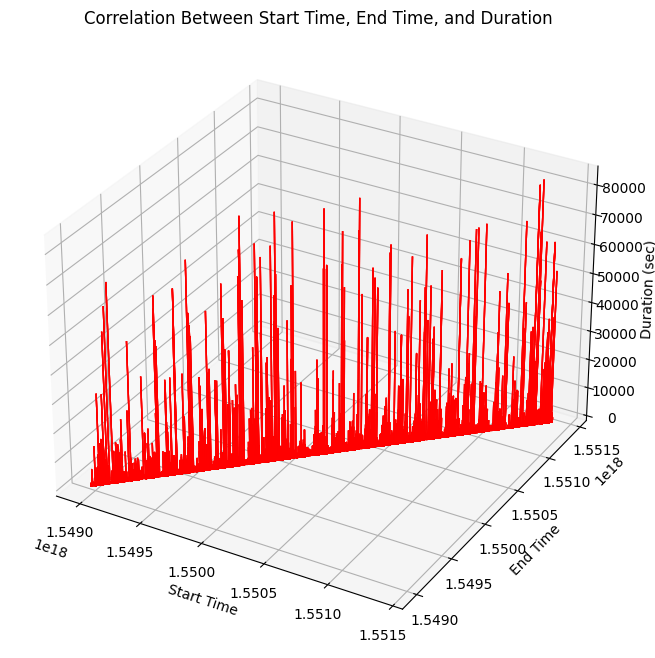

In [38]:
# Plot 3D bar plot
plot_3d_bar_time(df)

## Conclusions

`Summary:` The majority of bike-sharers in all trips are aged between 20-40. Trip duration is inversely proportional to user age, with younger users taking longer trips, and males outnumbering other genders. Registered users constitute the majority, around 90%, of bike-sharing participants. Trip durations are evenly and reasonably distributed within the time frame from start to finish.